# Diabetes Prediction Using Machine Learning

![](https://th.bing.com/th/id/R.93a34add728d3880841fb131262e39aa?rik=YEdot7%2fzIBz1RQ&riu=http%3a%2f%2fraynardsanito.com%2fwp-content%2fuploads%2f2016%2f01%2fDiabetes-Mellitus-.jpg&ehk=%2fo6g3ynPSvGpBgGTzDYH%2f2s84IYYOOpZH5k1ZSgsmms%3d&risl=&pid=ImgRaw&r=0)

In [1]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


### How to run the code

This tutorial is an executable [Jupyter notebook](https://jupyter.org) hosted on [Jovian](https://www.jovian.ai). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

>  **Jupyter Notebooks**: This tutorial is a [Jupyter notebook](https://jupyter.org) - a document made of _cells_. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results, e.g., numbers, messages, graphs, tables, files, etc., instantly within the notebook. Jupyter is a powerful platform for experimentation and analysis. Don't be afraid to mess around with the code & break things - you'll learn a lot by encountering and fixing errors. You can use the "Kernel > Restart & Clear Output" menu option to clear all outputs and start again from the top.

## *Work Flow*

> $**First Step**$
* Diabeties Data
* Data Processing/Cleaning
* Exploratory Data Analysis
* Train Test Split 
* Support Vector Machine Classifier
> $**Step Two**$
* New Data
* Support Vector Machine Classifier
* Diabetic and Non-Diabetic Prediction

![](https://i.ytimg.com/vi/wEo5PdCD5Tk/maxresdefault.jpg)

### About The Diseases

> Diabetes mellitus is a condition defined by persistently high levels of sugar (glucose) in the blood. There are several types of diabetes. The two most common are called type 1 diabetes and type 2 diabetes.

> During digestion, food is broken down into its basic components. Carbohydrates are broken down into simple sugars, primarily glucose. Glucose is a critically important source of energy for the body’s cells. To provide energy to the cells, glucose needs to leave the bloodstream and get inside the cells.

> An organ in the abdomen called the pancreas produces a hormone called insulin, which is essential to helping glucose get into the body's cells. In a person without diabetes, the pancreas produces more insulin whenever blood levels of glucose rise (for example, after a meal), and the insulin signals the body's cells to take in the glucose. In diabetes, either the pancreas's ability to produce insulin or the cells' response to insulin is altered.

$**Importing Libraries**$

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

#### Data collection

`DATASET` : **DIABETES DATASET**

>Getting the data using the `opendatasets` helper library to download the files from kaggle.

In [ ]:
import opendatasets as od

In [26]:
url = 'https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset/download?datasetVersionNumber=1'
od.download(url)

NameError: name 'od' is not defined

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")

In [3]:
diabetes_df.sample(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
566,1,99,72,30,18,38.6,0.412,21,0
738,2,99,60,17,160,36.6,0.453,21,0
346,1,139,46,19,83,28.7,0.654,22,0
582,12,121,78,17,0,26.5,0.259,62,0


## Data Preparation and Cleaning
Let's select a subset of columns with the relevant data for our analysis.

In [4]:
diabetes_df.shape

(768, 9)

In [5]:
# Statistical measurement of the data
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data contains no nan value

In [7]:
# The diabetes cases count and non-diabetic

diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* 0 > Non-Diabetic
* 1 > Diabetic
> We have 500 people who aren't diabetic and 268 who are diabetic

### The relationship between `columns` and `outcome`

> It is said that during pregnancy, your body makes more hormones and goes through other changes,such as weight gain. These changes cause your body's cells to use insulin less effectively, a condition called insulin resistance. Insulin resistance increases your body's need for insulin.

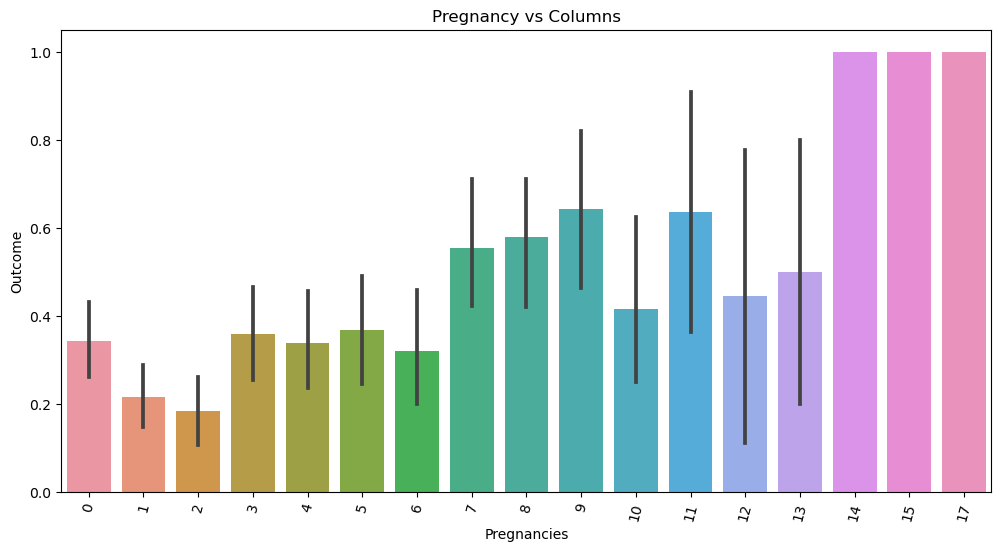

In [8]:
plt.figure(figsize=(12,6))
# to slant the country in x axis
plt.xticks(rotation=75)
plt.title("Pregnancy vs Columns")
sns.barplot(x=diabetes_df.Pregnancies, y=diabetes_df.Outcome);

From the chart above, the pregnancy level to outcome isn't uniform although from `14 - 15`are actually diabetic

#### mean

In [9]:
# Checking each mean value 
diabetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


* The diabetic people have a greater mean in the `glucose`and `age` column, and the major causes of diabetes is excess glucose in the blood.
This and all other factors is what our machine learning model will use in predicting if one has dabeties or not

## Checking Correlation

In [10]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


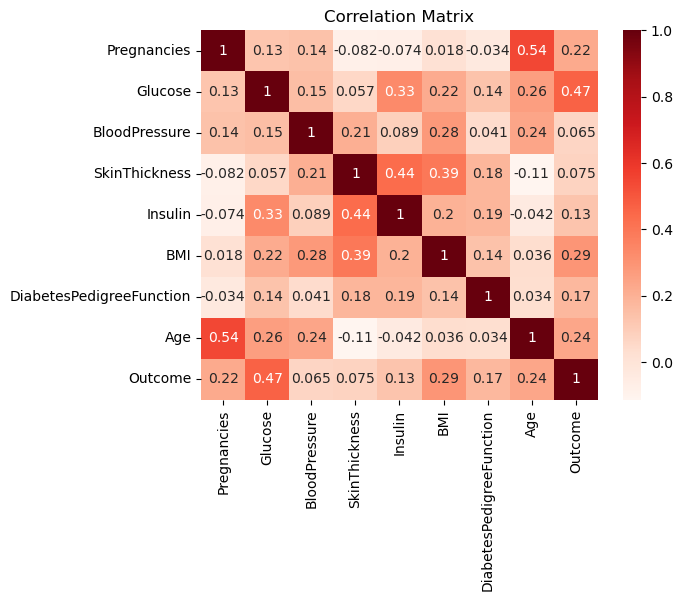

In [11]:
sns.heatmap(diabetes_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [12]:
# Seperating Data and labels

labels = diabetes_df.drop(columns = 'Outcome',axis = 1)
target = diabetes_df['Outcome']

In [13]:
labels.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [14]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Standardizing the data

Appling scaling using the StandardScaler class from `scikit-learn`.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(labels)

StandardScaler()

In [18]:
standardized_data = scaler.transform(labels)

In [19]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [20]:
labels = standardized_data
target=diabetes_df['Outcome']

In [21]:
print(labels)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Splitting data into train test split

In [22]:
labels_train,labels_test,target_train,target_test = train_test_split(labels,target,test_size = 0.2,stratify = target,random_state=0)

In [23]:
print(labels.shape,labels_train.shape,labels_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the model

In [24]:
classifier = svm.SVC(kernel='linear') 

In [25]:
# training the support vector machine classifier

classifier.fit(labels_train,target_train)

SVC(kernel='linear')

In [26]:
# Finding accuracy score on the training data
labels_train_prediction = classifier.predict(labels_train)
training_data_accuracy = accuracy_score(labels_train_prediction,target_train)

In [27]:
print("The acuracy score of the training data: ", training_data_accuracy)

The acuracy score of the training data:  0.7801302931596091


In [28]:
# Finding accuracy score on the training data
labels_test_prediction = classifier.predict(labels_test)
test_data_accuracy = accuracy_score(labels_test_prediction,target_test)

In [29]:
print("The acuracy score of the text data: ", test_data_accuracy)

The acuracy score of the text data:  0.7792207792207793


The accuracy score for both the text data and training data is good this small amount of data

Making the predicting system to predict is a person is diabetic or not based on the information collected from the individual.

## *Predicting System*

This is going to predict based on `0` and `1`

* 0 > Not Diabetic
* 1 > Diabetic

In [30]:
input_data = (4,110,92,0,0,37.6,0.291,30)

# changin the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for only one instance

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data =  scaler.transform(input_data_reshape)

print(std_data)


[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.5462679  -0.27575966]]


In [32]:
prediction = classifier.predict(std_data)

print('The prediction is :', prediction)

if prediction[0] == 0:
    print("Non-Diabetic")
else:
    (print("Diabetic"))

The prediction is : [0]
Non-Diabetic



### $THE-MODEL-PREDICTED-CORRECTLY$

Deployment on streamlit

In [33]:
import pickle

In [34]:
filename = "trained_model.sav"
pickle.dump(classifier,open(filename,"wb"))

In [36]:
# loading the saved model

loaded_model = pickle.load(open("trained_model.sav","rb"))

In [42]:
input_data = (5,116,72,19,175,25.8,0.587,51)

# changin the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for only one instance

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshape)

print('The prediction is :', prediction)

if prediction[0] == 0:
    print("Non-Diabetic")
else:
    (print("Diabetic"))

The prediction is : [1]
Diabetic
